In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from evolvepro.src.data import load_dms_data
from evolvepro.src.evolve import directed_evolution_simulation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
import pca_visualisation
import simulation_pipeline
import math
import random

In [2]:
# load dataset
dataset_name = "jones"
model_name = "esm1b_t33_650M_UR50S"
embeddings_path = "output/dms/embeddings"
labels_path = "output/dms/labels"
embeddings_file_type = "csv"
embeddings_type_pt = "average"
embeddings, labels = load_dms_data(dataset_name, model_name, embeddings_path, labels_path, embeddings_file_type, embeddings_type_pt)

Embeddings and labels are aligned


In [11]:
model = RandomForestRegressor(n_estimators=200, criterion='friedman_mse', max_depth=None, min_samples_split=2,
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=round(math.log2(1280)),
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                    n_jobs=None, random_state=1, verbose=0, warm_start=False, ccp_alpha=0.0,
                                    max_samples=None)
predicted_activities, metrics, final_cycl_predictions = simulation_pipeline.model_simulation(
    embeddings = embeddings,
    labels = labels,
    output_dir = "output/RF_simulations",
    predict_all = True,
    activity = "activity",
    cycles = 10,
    num_per_cycle = 10,
    model = model,
    random_seed = 1234,
    selection_method= "limit_AA"
)
metrics

,iteration,next_iter_variants,train_error,test_error,median_activity,top_activity,activity_binary_percentage,top_variant,top_final_round_variants
0,0,G37T R344P L339R Y141H Q370A V160Y T384N I121K...,NaN,NaN,NaN,NaN,NaN,None,None
1,1,G351A N187A G353A Q26A Y308F N357T N359V G358L...,0.097364,0.530138,2.709383,3.095172,0.4,G37T,G37T Q370A G351A M96Y N187A N187Q N187K G351T ...
2,2,Q391A G392A G365A Q179A G403A G389A G257A G361...,0.056755,0.508800,2.609362,3.095172,0.4,G37T,Q26A G37T G353A M96Y Q370A Q391A G392A G358A G...
3,3,G35A G383A G5A S346T G2T P20A G255A S356A S355...,0.047290,0.511240,2.834674,3.305205,0.6,G403A,G403A G37T G257A Q26A G353A G392A G35A G361A M...
4,4,G252A S396T V33L E30T P382A V24A D386Q S407T E...,0.038983,0.505986,2.739257,3.305205,0.5,G403A,G403A G37T Q26A G257A G353A G392A G383A Q370A ...
5,5,S364T S246T D300T W32T G7T S262T C378T Q243Y N...,0.052232,0.543342,3.014005,4.517515,0.9,S396T,S396T G403A G37T Q26A G257A G353A V33L S396H S...
6,6,S41W Q197V P138W C265F E306V S345F T274W N148V...,0.094994,0.717867,3.181995,6.144133,0.6,S262T,S262T S396T S246T S262V S262M G403A S262A S396...
7,7,N244Y K348Y S143P S161I G320M K263T S261I K375...,0.096988,0.654246,3.468559,6.144133,0.8,S262T,S262T S396T S220T S246T S262V S262I S262M G403...
8,8,A128W N312Y N318W Q299T Q247M S17T S8I Q250T D...,0.092872,0.643939,3.669548,6.144133,0.8,S262T,S262T S261I S396T S220T S246T S262V S262I G403...
9,9,N6I P14I A13I A9I P4I L12I A19I N15I W109L A85I,0.137819,0.746163,3.838219,6.246139,0.9,G7I,S8I S262T S261I S396T N6I S8F P14I A13I A9I G7I


In [12]:
model = RandomForestRegressor(n_estimators=200, criterion='friedman_mse', max_depth=None, min_samples_split=2,
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=round(math.log2(1280)),
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                    n_jobs=None, random_state=1, verbose=0, warm_start=False, ccp_alpha=0.0,
                                    max_samples=None)
predicted_activities, metrics, final_cycl_predictions = simulation_pipeline.model_simulation(
    embeddings = embeddings,
    labels = labels,
    output_dir = "output/RF_simulations",
    predict_all = True,
    activity = "activity",
    cycles = 10,
    num_per_cycle = 10,
    model = model,
    random_seed = 1234,
)
metrics

,iteration,next_iter_variants,train_error,test_error,median_activity,top_activity,activity_binary_percentage,top_variant,top_final_round_variants
0,0,G37T R344P L339R Y141H Q370A V160Y T384N I121K...,NaN,NaN,NaN,NaN,NaN,None,None
1,1,G351A N187A N187Q N187K G351T G353A Q26A G353I...,0.097364,0.530138,2.709383,3.095172,0.4,G37T,G37T Q370A G351A M96Y N187A N187Q N187K G351T ...
2,2,G403A Q363A E379A G365A I47V S41T N359A N405T ...,0.053493,0.524807,2.771159,3.305205,0.5,G403A,Q26A G37T N187K G353A N187Q N187T M96Y Q370A G...
3,3,G392A E379T D386Q G403T E379K G403V E371Q E379...,0.063017,0.530521,2.785268,3.617648,0.5,E379A,E379A G403A G37T Q26A G392A G353A E379T N187K ...
4,4,D386A E373A D400A E385A D400V N187R S356A G389...,0.055778,0.535830,2.892080,3.617648,0.7,E379A,E379A G403A G403V Q26A G37T N187K G353A G392A ...
5,5,G383A G358A P14A S407A W32Q D410A E379Q G35T Q...,0.049341,0.537544,2.892080,3.617648,0.7,E379A,E379A G403A G403V Q26A G37T G353A N187Q N187K ...
6,6,Q26T G37S E27S D300S E306H Q299S D29L Q250T E2...,0.055136,0.549459,3.036007,3.930427,0.7,Q26S,Q26S E379A G403A E379Q G37T G403V Q26A D410A E...
7,7,D29V R28S D29I D29F D29M D29Y R28T P14F G16W G2L,0.057457,0.563964,3.125041,3.930427,0.9,Q26S,Q26S D29L E379A G403A E379Q G37T D29V G403V Q2...
8,8,G16L D29W G16F N15L N15W N15C D29C G7L N15F G7W,0.057655,0.589382,3.345879,4.252329,1.0,D29F,D29F D29L Q26S G16W E379A G403A G2L E379Q G16L...
9,9,N6L N6W N6F N6C R131H N15M R131Q N6I N6V R131C,0.064839,0.648881,3.861982,5.511047,0.9,N6W,G7W N15L D29F D29L G16W Q26S G16L N6L N6W N15F


In [24]:
metrics_list = []
for i in range(0, 30):
    model = RandomForestRegressor(n_estimators=200, criterion='friedman_mse', max_depth=None, min_samples_split=2,
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=round(math.log2(1280)),
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                    n_jobs=None, random_state=1, verbose=0, warm_start=False, ccp_alpha=0.0,
                                    max_samples=None)
    predicted_activities, metrics, final_cycle_predictions = simulation_pipeline.model_simulation(
        embeddings = embeddings,
        labels = labels,
        output_dir = "output/RF_simulations",
        predict_all = True,
        activity = "activity",
        cycles = 10,
        num_per_cycle = 10,
        model = model,
        random_seed = i,
        limit_AA_selection = False
    )
    metrics_list.append(metrics)


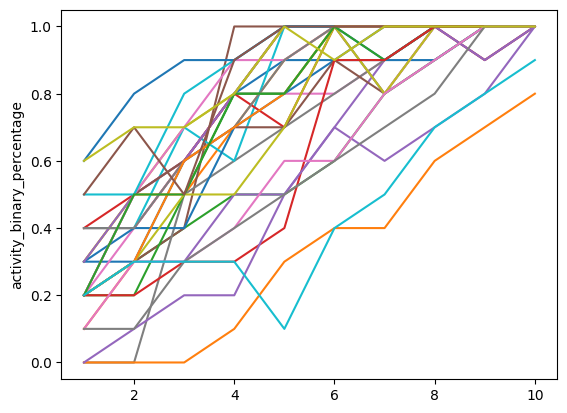

In [25]:
for i in range(0, 30):
    sns.lineplot(metrics_list[i]['activity_binary_percentage'])

In [26]:
metrics_list = []
for i in range(0, 30):
    model = RandomForestRegressor(n_estimators=200, criterion='friedman_mse', max_depth=None, min_samples_split=2,
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=round(math.log2(1280)),
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                    n_jobs=None, random_state=1, verbose=0, warm_start=False, ccp_alpha=0.0,
                                    max_samples=None)
    predicted_activities, metrics, final_cycle_predictions = simulation_pipeline.model_simulation(
        embeddings = embeddings,
        labels = labels,
        output_dir = "output/RF_simulations",
        predict_all = True,
        activity = "activity",
        cycles = 10,
        num_per_cycle = 10,
        model = model,
        random_seed = i,
        limit_AA_selection = True
    )
    metrics_list.append(metrics)

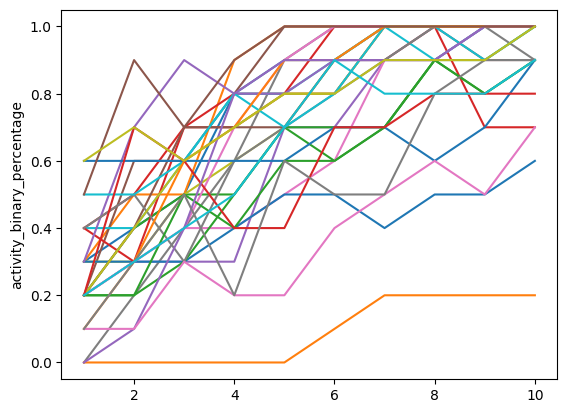

In [27]:
for i in range(0, 30):
    sns.lineplot(metrics_list[i]['activity_binary_percentage'])

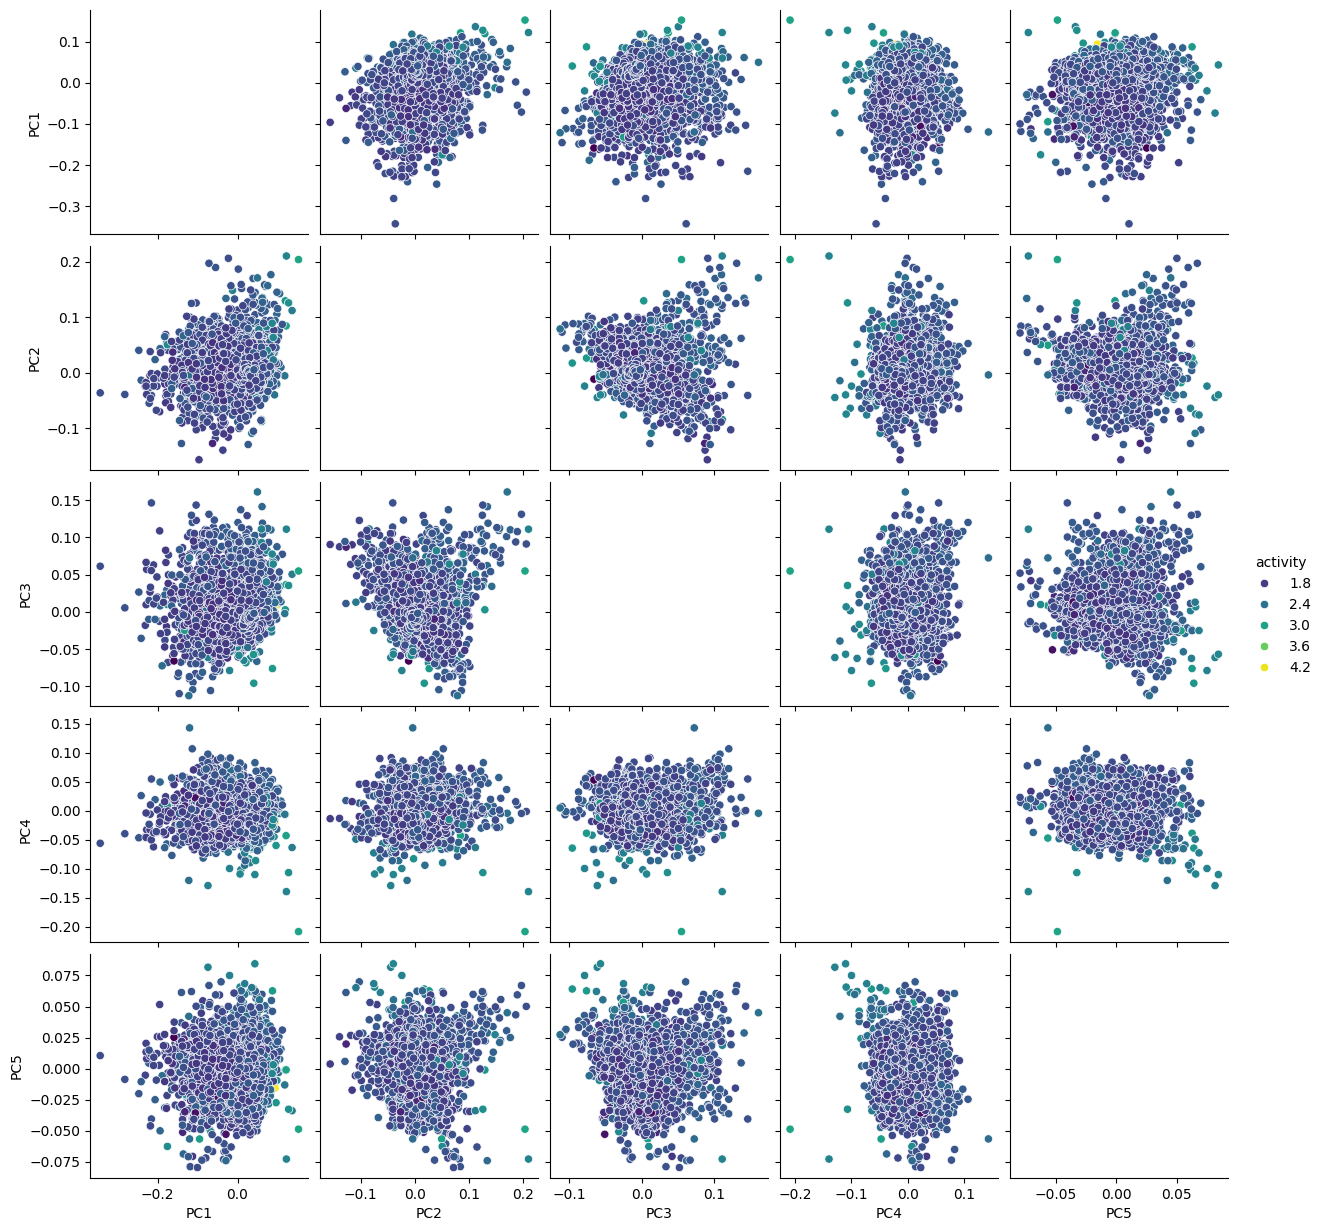

In [10]:
pca = pca_visualisation.Create_PCA(
    embedding_path = "output/dms/embeddings/jones_esm1b_t33_650M_UR50S.csv",
    labels_path = "output/RF_simulations/final_cycle_predictions.csv",
    label_name="predicted_activity",
    n_dims=5
)

pca.visualise_labels()